In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [29]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df1 = train.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
df1['Sex'] = df1['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df1['S'] = df1['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
df1['C'] = df1['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
df1.drop('Embarked',axis = 1,inplace = True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,1,0
3,1,1,0,35.0,1,0,53.1000,1,0
4,0,3,1,35.0,0,0,8.0500,1,0


In [32]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
S             0
C             0
dtype: int64

In [33]:
df1.drop(630,inplace = True)

In [34]:
Q1 = df1['Fare'].quantile(0.25)
Q3 = df1['Fare'].quantile(0.75)
IQR = Q3-Q1
df1 = df1[-((df1['Fare'] < (Q1 - 1.5 * IQR)) |(df1['Fare'] > (Q3 + 1.5 * IQR)))]

In [47]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_train = pd.DataFrame(imputer.fit_transform(df1.drop('Survived',axis = 1)),columns = df1.drop('Survived',axis = 1).columns)

In [48]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,3.0,1.0,22.000000,1.0,0.0,7.2500,1.0,0.0
1,3.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0
2,1.0,0.0,35.000000,1.0,0.0,53.1000,1.0,0.0
3,3.0,1.0,35.000000,0.0,0.0,8.0500,1.0,0.0
4,3.0,1.0,54.833333,0.0,0.0,8.4583,0.0,0.0
...,...,...,...,...,...,...,...,...
769,2.0,1.0,27.000000,0.0,0.0,13.0000,1.0,0.0
770,1.0,0.0,19.000000,0.0,0.0,30.0000,1.0,0.0
771,3.0,0.0,14.666667,1.0,2.0,23.4500,1.0,0.0
772,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0


In [51]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='minority')
X,Y = sm.fit_resample(df_train,df1['Survived'])

In [229]:
x1,x2,y1,y2 = train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=42)

0.8901098901098901
0.848780487804878


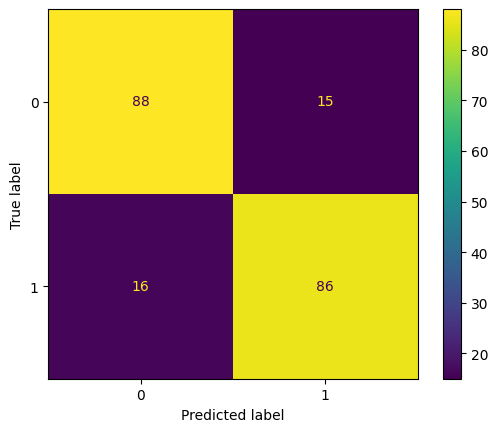

In [233]:
xgb = XGBClassifier(
    eta = 0.025431601690283034,
    max_depth = 35,
    subsample = 0.5470483290852317,
    reg_lambda = 1.5265460224247218,
    reg_alpha = 1.1985197077051777
    )
xgb.fit(x1,y1)
print(xgb.score(x1,y1))
print(xgb.score(x2,y2))

cm = confusion_matrix(y2,xgb.predict(x2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

0.9316239316239316
0.8536585365853658


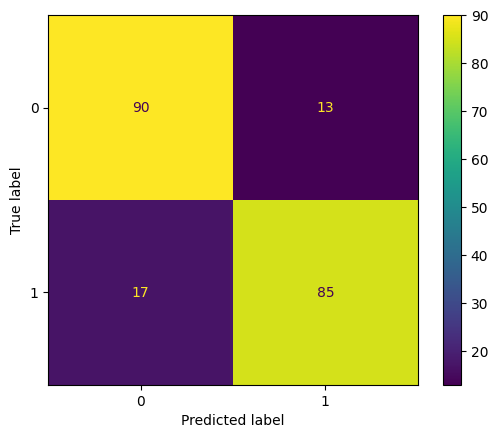

In [236]:
lgbm = LGBMClassifier(
    learning_rate = 0.07443126960465941,
    reg_lambda = 3.4053393644390684
    )
lgbm.fit(x1,y1)
print(lgbm.score(x1,y1))
print(lgbm.score(x2,y2))

cm = confusion_matrix(y2,lgbm.predict(x2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

0.9865689865689866
0.824390243902439


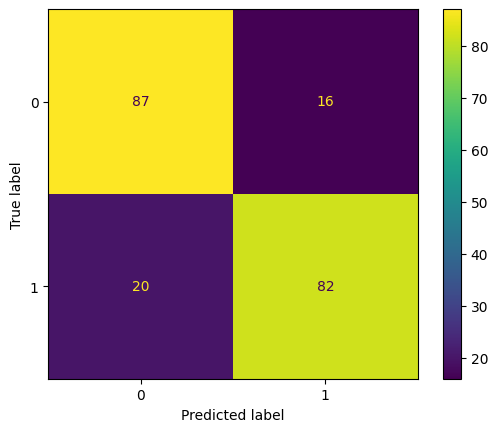

In [284]:
rf = RandomForestClassifier(
    criterion = 'log_loss',
    n_estimators = 75,
    max_depth=183
)
rf.fit(x1,y1)
print(rf.score(x1,y1))
print(rf.score(x2,y2))

cm = confusion_matrix(y2,rf.predict(x2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [288]:
estimators = [
    ('xgb',xgb),
    ('lgbm',lgbm),
    ('rf',rf)
]

vc = VotingClassifier(estimators=estimators, voting = 'soft')

vc.fit(x1,y1)
print(vc.score(x1,y1))
print(vc.score(x2,y2))

0.9426129426129426
0.8439024390243902


In [289]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [290]:
df_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [291]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [292]:
df_test['Sex'] = df_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_test['S'] = df_test['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
df_test['C'] = df_test['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
df_test.drop('Embarked',axis = 1,inplace = True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,3,1,34.5,0,0,7.8292,0,0
1,3,0,47.0,1,0,7.0000,1,0
2,2,1,62.0,0,0,9.6875,0,0
3,3,1,27.0,0,0,8.6625,1,0
4,3,0,22.0,1,1,12.2875,1,0


In [293]:
df_test = imputer.transform(df_test)

In [295]:
y_pred = vc.predict(df_test)
result = pd.DataFrame(test['PassengerId'])
result['Survived'] = y_pred 
result.head()

c:\Users\akhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [296]:
result.to_csv('result.csv',index = False)